In [48]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

#### Question - 1 (i)

In [49]:
def DiagDom(A) -> None:
    """Function that checks if the given matrix is diagonal dominant or not."""
    diag_coeff = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
    if np.all(diag_coeff > row_sum):
        print("\nMatrix is Diagonally Dominant")
    else:
        print("\nNOT Diagonally Dominant")
    return


A = np.random.randint(-10, 10, size=(4, 4))
print(A)
DiagDom(A)


[[  4  -2   5   9]
 [  6  -9   9  -2]
 [ -9 -10   3  -4]
 [ -2   5  -3  -3]]

NOT Diagonally Dominant


In [51]:
def generate_Diag_Dominant_matrix():
    """
    This function will generate diagonal dominant martix.
    This function may take time as matrix generation is completely random.
    """
    flag = True
    iteration_counter = 0
    while flag:
        A = np.random.randint(-10, 10, size=(4, 4))
        diag_coeff = np.diag(np.abs(A))
        row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
        if np.all(diag_coeff > row_sum):
            flag = False
        else:
            flag = True
        iteration_counter += 1
    # print(f"Diagonal dominant martix Iteration completed after {iteration_counter} iterations")
    print(A)
    return A


# generate_Diag_Dominant_matrix()


#### Question - 1 (ii)

In [52]:
def gauss_seidal(A, b, n) -> list:
    """Implementation of Gauss seidal Algorithm"""
    # this list will contain the np.linalg.norm(<difference arry>)
    iterations_list = []
    print("System of equations:\n")
    # iterating over the rows
    for i in range(A.shape[0]):
        row = ["{0:3g}*x{1}".format(A[i, j], j + 1) for j in range(A.shape[1])]
        print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))
        x = np.zeros_like(b)

    print("\nIterations:\n")

    # Perform n number of iterations
    for it_count in range(0, n):
        x_new = np.zeros_like(x)
        print("Iteration {0}: {1}".format(it_count, x))
        print("1 Norm", np.linalg.norm(x, ord=1))
        print("Inf Norm: ", LA.norm(x, np.inf))
        print("Frobenius Norm", np.linalg.norm(x, ord=2))
        print("*" * 50)

        for i in range(A.shape[0]):
            # using new values directly in x_new
            s1 = np.dot(A[i, :i], x_new[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
            if np.allclose(x, x_new, rtol=1e-8):
                break
        diff_matrix = x_new - x
        iterations_list.append(np.linalg.norm(diff_matrix))
        x = x_new

    print("\nSolution: {0}".format(x))
    error = np.dot(A, x) - b
    print("\nError: {0}".format(error))
    return iterations_list


In [55]:
# n is number of iterations
n = 5
# initialize the matrix
A = np.random.randint(1, 5, size=(4, 4))
# initialize the RHS vector
b = np.round(np.random.uniform(1, 5, 4), 0)
gauss_seidal(A, b, n);


System of equations:

[  3*x1 +   2*x2 +   4*x3 +   3*x4] = [  4]
[  1*x1 +   2*x2 +   4*x3 +   4*x4] = [  3]
[  1*x1 +   3*x2 +   4*x3 +   1*x4] = [  3]
[  4*x1 +   2*x2 +   4*x3 +   3*x4] = [  3]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
**************************************************
Iteration 1: [ 1.33333333  0.83333333 -0.20833333 -1.05555556]
1 Norm 3.4305555555555554
Inf Norm:  1.3333333333333333
Frobenius Norm 1.9052093141868158
**************************************************
Iteration 2: [ 2.11111111  2.97222222 -1.74305556 -1.47222222]
1 Norm 8.29861111111111
Inf Norm:  2.9722222222222223
Frobenius Norm 4.300764583546328
**************************************************
Iteration 3: [ 3.14814815  6.35648148 -4.43634259 -1.52006173]
1 Norm 15.461033950617283
Inf Norm:  6.356481481481481
Frobenius Norm 8.503376790668996
**************************************************
Iteration 4: [ 4.5308642  11.14737654 -8.36323302 -1.32175

#### Question - 1 (iii)

In [56]:
def gauss_jacobi(A, b, n):
    # this list will contain the np.linalg.norm(<difference arry>)
    iterations_list = []
    # prints the system
    print("System of equations:\n")
    for i in range(A.shape[0]):
        row = ["{}*x{}".format(A[i, j], j + 1) for j in range(A.shape[1])]
        print("[{0}] = [{1:3g}]".format(" + ".join(row), b[i]))
    print("\nIterations:\n")
    x = np.zeros_like(b)
    for it_count in range(n):
        print("Iteration {0}: {1}".format(it_count, x))
        print("1 Norm", np.linalg.norm(x, ord=1))
        print("Inf Norm: ", LA.norm(x, np.inf))
        print("Frobenius Norm", np.linalg.norm(x, ord=2))
        x_new = np.zeros_like(x)

        for i in range(A.shape[0]):
            s1 = np.dot(A[i, :i], x[:i])
            s2 = np.dot(A[i, i + 1 :], x[i + 1 :])
            # update x_new at the last
            x_new[i] = (b[i] - s1 - s2) / A[i, i]
        if np.allclose(x, x_new, atol=1e-10, rtol=0.0):
            break
        diff_matrix = x_new - x
        iterations_list.append(np.linalg.norm(diff_matrix))
        x = x_new

    print("\nSolution: {0}".format(x))
    error = np.dot(A, x) - b
    print("\nError: {0}".format(error))
    return iterations_list


In [57]:
n = 5
# initialize the matrix
A = np.random.randint(1, 10, size=(4, 4))
# initialize the RHS vector
b = np.round(np.random.uniform(1, 5, 4), 0)
gauss_jacobi(A, b, n);


System of equations:

[2*x1 + 6*x2 + 4*x3 + 7*x4] = [  3]
[2*x1 + 2*x2 + 1*x3 + 9*x4] = [  4]
[6*x1 + 4*x2 + 4*x3 + 4*x4] = [  3]
[2*x1 + 1*x2 + 8*x3 + 9*x4] = [  2]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
Iteration 1: [1.5        2.         0.75       0.22222222]
1 Norm 4.472222222222222
Inf Norm:  2.0
Frobenius Norm 2.619519558249066
Iteration 2: [-6.77777778 -0.875      -3.72222222 -1.        ]
1 Norm 12.375
Inf Norm:  6.777777777777779
Frobenius Norm 7.845943848673862
Iteration 3: [15.06944444 15.13888889 12.79166667  5.13425926]
1 Norm 48.13425925925926
Inf Norm:  15.13888888888889
Frobenius Norm 25.421673172840563
Iteration 4: [-87.46990741 -42.56944444 -42.12731481 -16.17901235]
1 Norm 188.34567901234567
Inf Norm:  87.4699074074074
Frobenius Norm 107.23625038277503

Solution: [270.08950617 183.33912037 190.7033179   61.83641975]

Error: [2832.88194444 1650.08834877 3361.05246914 2803.6724537 ]


#### Question - 1 (iv)

[[-9 -1 -1 -4]
 [ 4  9 -2  0]
 [ 0  1 -8 -5]
 [ 1  3  0 -6]]
Matrix is Diagonally Dominant

System of equations:

[ -9*x1 +  -1*x2 +  -1*x3 +  -4*x4] = [  4]
[  4*x1 +   9*x2 +  -2*x3 +   0*x4] = [  1]
[  0*x1 +   1*x2 +  -8*x3 +  -5*x4] = [  4]
[  1*x1 +   3*x2 +   0*x3 +  -6*x4] = [  3]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
**************************************************
Iteration 1: [-0.44444444  0.30864198 -0.46141975 -0.41975309]
1 Norm 1.6342592592592593
Inf Norm:  0.46141975308641975
Frobenius Norm 0.8257672645589631
**************************************************
Iteration 2: [-0.24091221  0.11564548 -0.22319864 -0.48232929]
1 Norm 1.0620856195701873
Inf Norm:  0.48232929431489097
Frobenius Norm 0.5948712034256977
**************************************************
Iteration 3: [-0.21812552  0.15845609 -0.17873718 -0.45712621]
1 Norm 1.0124449962460556
Inf Norm:  0.4571262085066828
Frobenius Norm 0.5599985929164581
**********

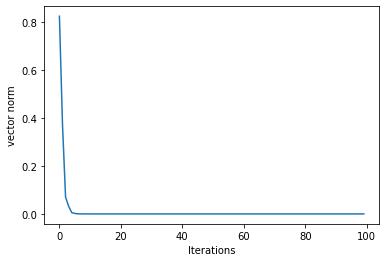

In [58]:
def DiagDom(A):
    diag_coeff = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
    if np.all(diag_coeff > row_sum):
        print("Matrix is Diagonally Dominant\n")
    else:
        print("NOT Diagonally Dominant\n")
    return


n = 100
A = generate_Diag_Dominant_matrix()
b = np.round(np.random.uniform(1, 5, 4), 0)  # B can be randomly initialised
DiagDom(A)
iteration_list = gauss_seidal(A, b, n)
# print(iteration_list)

plt.plot(iteration_list)
plt.xlabel("Iterations")
plt.ylabel("vector norm")
plt.show()


#### Question - 1 (v)

Iteration completed after 1520982 iterations
[[-6 -1  4  0]
 [ 2 -9 -4  2]
 [ 3 -1 -9 -1]
 [-1  1 -4  8]]
Matrix is Diagonally Dominant

System of equations:

[-6*x1 + -1*x2 + 4*x3 + 0*x4] = [  3]
[2*x1 + -9*x2 + -4*x3 + 2*x4] = [  5]
[3*x1 + -1*x2 + -9*x3 + -1*x4] = [  4]
[-1*x1 + 1*x2 + -4*x3 + 8*x4] = [  2]

Iterations:

Iteration 0: [0. 0. 0. 0.]
1 Norm 0.0
Inf Norm:  0.0
Frobenius Norm 0.0
Iteration 1: [-0.5        -0.55555556 -0.44444444  0.25      ]
1 Norm 1.75
Inf Norm:  0.5555555555555556
Frobenius Norm 0.9048054152723517
Iteration 2: [-0.7037037  -0.41358025 -0.57716049  0.03472222]
1 Norm 1.729166666666667
Inf Norm:  0.7037037037037037
Frobenius Norm 1.0002836555668944
Iteration 3: [-0.81584362 -0.44770233 -0.63691701 -0.07484568]
1 Norm 1.9753086419753088
Inf Norm:  0.815843621399177
Frobenius Norm 1.1301784573283071
Iteration 4: [-0.84999428 -0.47041228 -0.65833143 -0.11447617]
1 Norm 2.0932141632373114
Inf Norm:  0.8499942844078646
Frobenius Norm 1.1791026515888452
Iterat

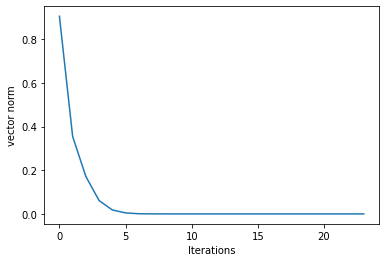

In [47]:
def DiagDom(A):
    diag_coeff = np.diag(np.abs(A))
    row_sum = np.sum(np.abs(A), axis=1) - diag_coeff
    if np.all(diag_coeff > row_sum):
        print("Matrix is Diagonally Dominant\n")
    else:
        print("NOT Diagonally Dominant\n")
    return


n = 100
A = generate_Diag_Dominant_matrix()
b = np.round(np.random.uniform(1, 5, 4), 0)  # B can be randomly initialised
DiagDom(A)
iteration_list = gauss_jacobi(A, b, n)
# print(iteration_list)

plt.plot(iteration_list)
plt.xlabel("Iterations")
plt.ylabel("vector norm")
plt.show()